# Partial-blockage Analysis

## load tables

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [88]:
agents_number_df = pd.read_csv('./agents_results.csv')
agents_number_df = agents_number_df.drop_duplicates(subset='damage')
agents_number_df = agents_number_df.loc[(agents_number_df['num_agents'] >= 100) & (agents_number_df['num_agents'] <= 1000)]
agents_number_df = agents_number_df.groupby(['planner', 'num_agents'], as_index=False).mean()
agents_number_df.head(100)

,planner,num_agents,num_robots,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,100,5.0,5.0,289.021946,0.060925,24519.685806,20.400000
1,Additive100StaticLackPlanner,200,5.0,5.0,293.834245,0.105812,49414.423809,37.300000
2,Additive100StaticLackPlanner,300,5.0,5.0,296.789991,0.193622,74075.000743,62.800000
3,Additive100StaticLackPlanner,400,5.0,5.0,297.416235,0.394197,98762.277380,85.900000
4,Additive100StaticLackPlanner,500,5.0,5.0,297.222438,0.576642,123461.156841,112.200000
...,...,...,...,...,...,...,...,...
70,StaticLineLackPlanner,100,5.0,5.0,144.815992,55.771023,16652.664019,54.500000
71,StaticLineLackPlanner,200,5.0,5.0,146.041138,421.468878,37263.864186,83.200000
72,StaticLineLackPlanner,300,5.0,5.0,151.375057,1448.080836,58211.554566,113.333333
73,StaticLineLackPlanner,400,5.0,5.0,150.257896,3382.819002,80212.528821,134.000000


In [89]:
f_df = pd.read_csv('./f_results.csv')
f_df = f_df.drop_duplicates(subset='damage')
# f_df = f_df.loc[(f_df['num_agents'] == 300)]
f_df = f_df.groupby(['planner','num_agents','f'], as_index=False).mean()
f_df.head()

,planner,num_agents,f,num_robots,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,200,1.1,5.0,5.0,1551.939609,1551.939609,0.709559,130430.907010,200.0
1,IterativeAssignmentPlanner,200,1.2,5.0,5.0,964.071445,964.071445,0.582133,76656.548872,200.0
2,IterativeAssignmentPlanner,200,1.3,5.0,5.0,731.415462,731.415462,0.621971,56521.152183,200.0
3,IterativeAssignmentPlanner,200,1.4,5.0,5.0,593.538810,593.538810,0.617540,45803.978075,200.0
4,IterativeAssignmentPlanner,200,1.5,5.0,5.0,506.707575,506.707575,0.725215,38956.520981,200.0


In [90]:
robots_df = pd.read_csv('./robots_results.csv')
robots_df = robots_df.drop_duplicates(subset=['planner', 'damage'])
robots_df = robots_df.loc[(robots_df['num_agents'] == 300)]
robots_df = robots_df.groupby(['planner', 'num_robots'], as_index=False).mean()
robots_df.head()

,planner,num_robots,num_agents,f,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,2,300.0,2.0,5.0,296.067522,0.118917,74135.078967,56.400000
1,Additive100StaticLackPlanner,3,300.0,2.0,5.0,296.223145,0.150640,73985.727370,62.066667
2,Additive100StaticLackPlanner,4,300.0,2.0,5.0,296.392819,0.167260,73911.385692,60.653846
3,Additive100StaticLackPlanner,5,300.0,2.0,5.0,296.857280,0.251480,73980.441761,64.320000
4,Additive100StaticLackPlanner,6,300.0,2.0,5.0,296.793421,0.261196,73976.182072,60.428571


## visualizations

In [91]:
planners_colors = {'IterativeAssignmentPlanner': 'red',
                   'KmeansAssignmentPlanner': 'brown',
                   'StaticLineLackPlanner': 'blue',
                   'SeparateStaticLackPlanner': 'green',
                   'Additive25StaticLackPlanner': 'salmon',
                   'Additive50StaticLackPlanner': 'gold',
                   'Additive100StaticLackPlanner': 'orange'}

linestyle = '-'
alpha=0.7

In [92]:
from typing import List

displayed_labels = {'damage': 'damage (k)',
                    'completion_time': 'completion time',
                    'active_time': 'active_time',
                    'planner_time': 'computation time (s)',
                    'num_disabled': 'disabled agents (%)',
                    'num_agents': 'num agents',
                    'num_robots': 'num robots',
                    'f': 'f (speed ratio)',
                    'd': 'd (disablement range)'}


def visualize(X: List[str], Y: List[str], data, file_to_save: str, title: str):
    plt.figure(figsize=(14, 10))
    plt.suptitle(title, fontsize=18)

    for i in range(len(Y)):
        x, y = X[i], Y[i]

        plt.subplot(2, 2, i + 1)
        plt.xlabel(displayed_labels[x], fontsize='14')
        plt.ylabel(displayed_labels[y], fontsize='14')
        for j in range(len(data)):
            r = data[j]

            if y == 'damage':
                plt.plot(list(r[x]), [element/1000 for element in list(r[y])], c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)
            elif y == 'num_disabled':
                if x == 'num_robots':
                    plt.plot(list(r[x]), [round(e/300, 2)*100 for e in list(r[y])], c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)
                else:
                    plt.plot(list(r[x]), [round(e1/e2, 2)*100 for e1,e2 in zip(list(r[y]),list(r[x]))], c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)
            else:
                plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)

        if i == 1:
            plt.legend(planners_colors.keys(), fontsize='14')

    plt.savefig(file_to_save)
    plt.show()

In [93]:
def vis_paper(X: List[str], data):
    Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']

    for i in range(len(Y)):
        x = X[i]
        y = Y[i]

        plt.xlabel(displayed_labels[x], fontsize='14')
        plt.ylabel(displayed_labels[y], fontsize='14')
        for j in range(len(data)):
            r = data[j]

            if y == 'damage':
                plt.plot(list(r[x]), [element/1000 for element in list(r[y])], c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)
            elif y == 'num_disabled':
                if x == 'num_robots':
                    plt.plot(list(r[x]), [round(e/300, 2)*100 for e in list(r[y])], c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)
                else:
                    plt.plot(list(r[x]), [round(e1/e2, 2)*100 for e1,e2 in zip(list(r[y]),list(r[x]))], c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)
            else:
                plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j], linestyle=linestyle, alpha=alpha)


        if i == 1:
            plt.legend(planners_colors.keys(), fontsize='14')

        plt.savefig(f'./plots/{x}-{y}.png')
        plt.show()

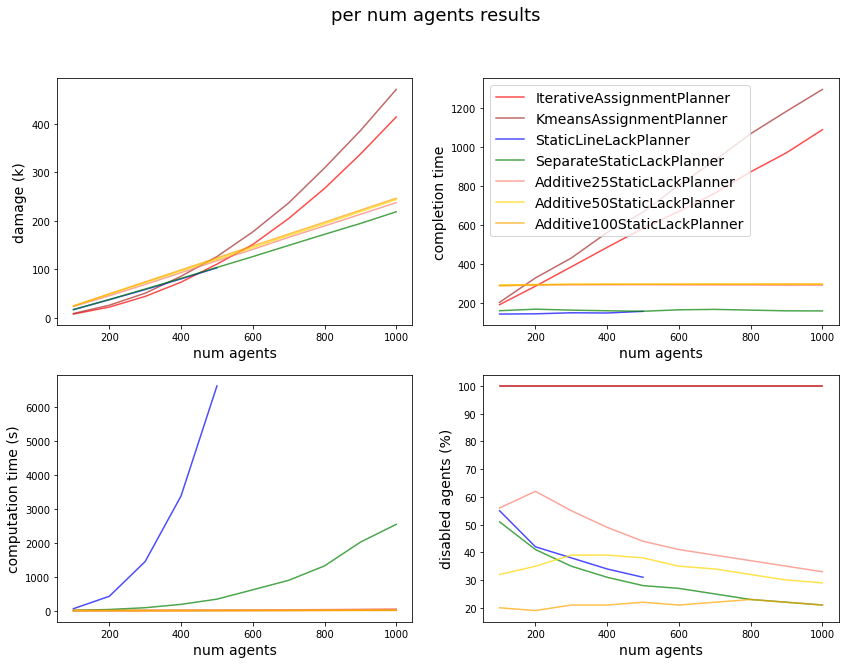

In [94]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for _ in Y]

agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num agents results'
file_to_save = './plots/partial_num_agents.png'

visualize(X, Y, agents_results, file_to_save, title)

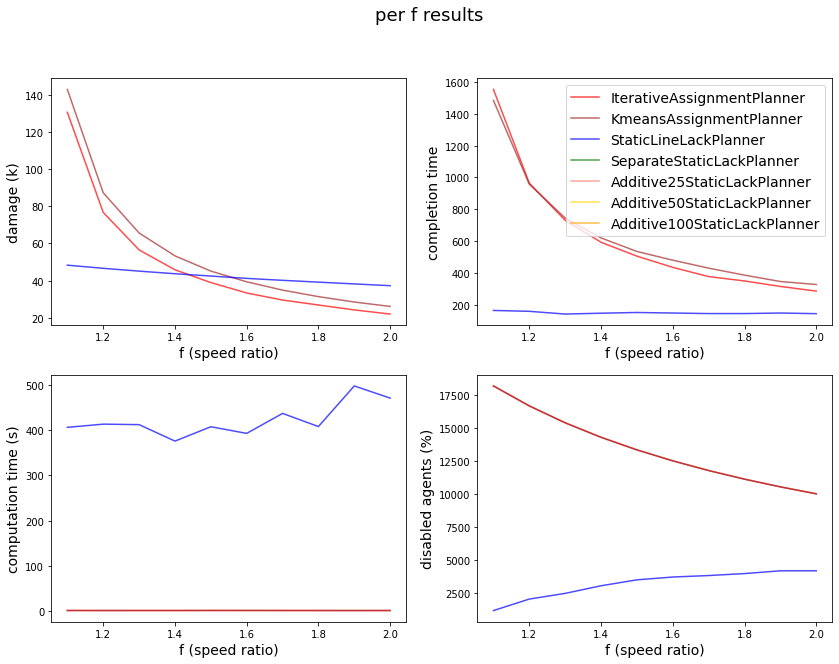

In [95]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for _ in Y]

f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
title = 'per f results'
file_to_save = './plots/partial_f.png'

visualize(X, Y, f_results, file_to_save, title)

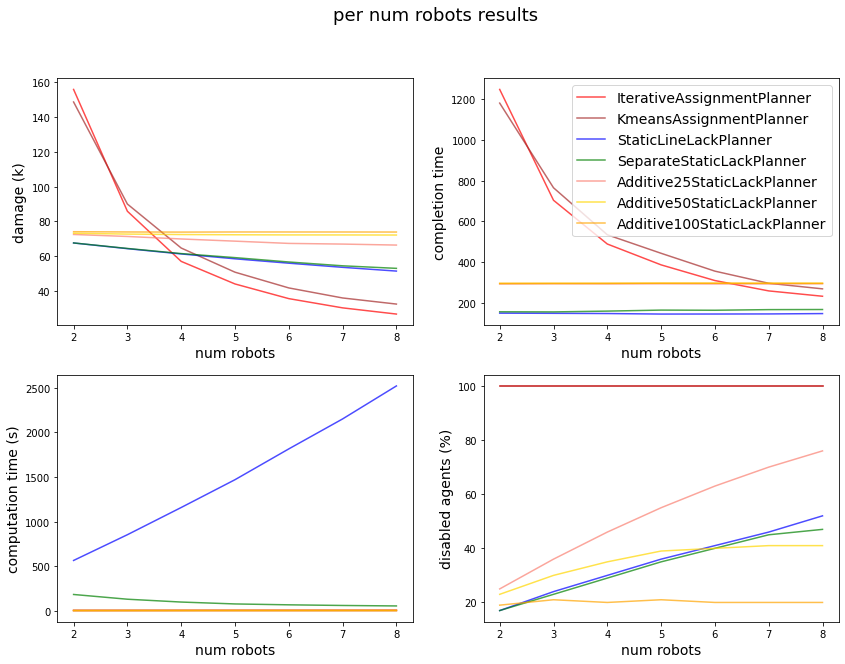

In [96]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_robots' for _ in Y]

robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num robots results'
file_to_save = './plots/partial_num_robots.png'

visualize(X, Y, robots_results, file_to_save, title)

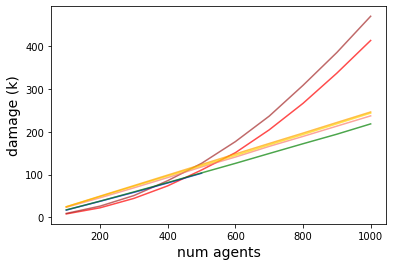

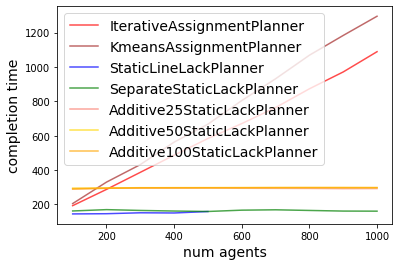

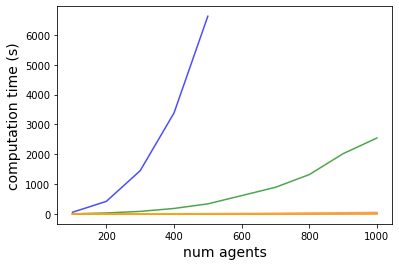

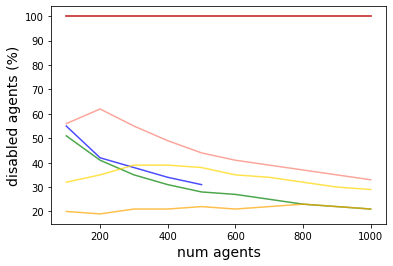

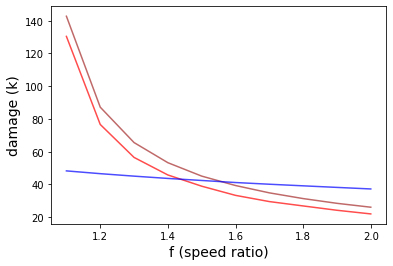

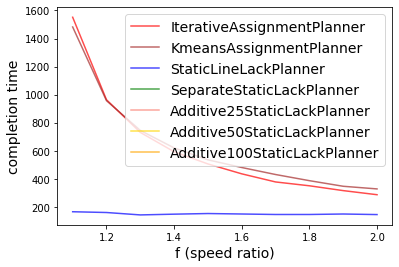

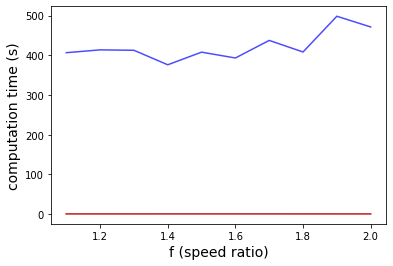

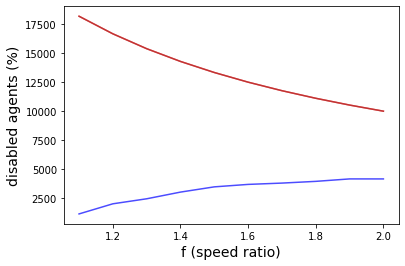

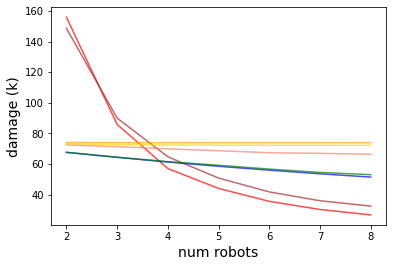

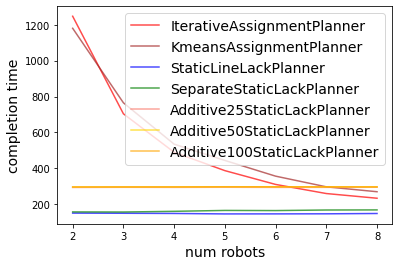

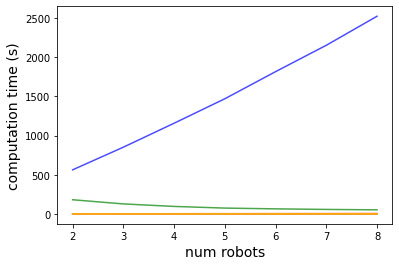

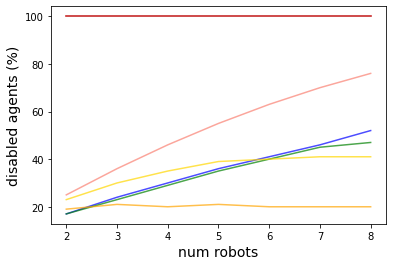

In [97]:
agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
X = ['num_agents' for _ in Y]
vis_paper(X, agents_results)
f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
X = ['f' for _ in Y]
vis_paper(X, f_results)
robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
X = ['num_robots' for _ in Y]
vis_paper(X, robots_results)

## run experiments

### config file

In [12]:
import json

with open('config.json') as json_file:
    config = json.load(json_file)
config

{'x_size': 100,
 'y_size_init': 100,
 'y_size': 300,
 'x_buffer': 10,
 'y_buffer': 10,
 'num_robots': 5,
 'num_agents': 5,
 'agent_speed': 1,
 'robot_speed': 2,
 'disablement_range': 5}

In [13]:
import json
import time
from random import seed

from world.agents.deterministic_agent import DeterministicAgent
from planners.deterministic.partial_blockage.additive_static_lack_planner import AdditiveStaticLackPlanner
from planners.deterministic.partial_blockage.separate_static_lack_planner import SeparateStaticLackPlanner

from planners.planner import Planner
from utils.functions import *

In [14]:
def run(planner: Planner):
    agents = [DeterministicAgent(sample_point(config['x_buffer'], config['x_buffer'] + config['x_size'],
                                              config['y_buffer'], config['y_buffer'] + config['y_size_init']),
                                 config['agent_speed']) for _ in range(config['num_agents'])]

    robots = [BasicRobot(sample_point(0, config['x_size'] + 2 * config['x_buffer'], 0, config['y_buffer']),
                         config['robot_speed'], config['disablement_range'])
              for _ in range(config['num_robots'])]

    env = Environment(agents=agents, robots=robots, border=config['y_size'] + config['y_buffer'])

    before = time.time()
    movement, completion_time, expected_damage, expected_num_disabled = planner.plan(env)
    planning_time = time.time() - before

    write_report(planner=str(planner),
                 num_agents=config['num_agents'],
                 num_robots=config['num_robots'],
                 f=config['robot_speed'] / config['agent_speed'],
                 d=config['disablement_range'],
                 active_or_copmletion_time=completion_time,
                 planner_time=planning_time,
                 damage=expected_damage,
                 num_disabled=expected_num_disabled,
                 file_name='agents_results.csv',
                 is_active_time=False)


In [29]:
planners = [SeparateStaticLackPlanner()]

for planner in planners:
    for v in [900, 1000, 100, 200, 300, 400, 500, 600, 700, 800]:
        print(f'*** *** v={v} *** ***')
        for s in range(10):
            seed(s)

            config['num_agents'] = v
            print(f'running {str(planner)} with seed {s}..')
            run(planner)

*** *** v=900 *** ***
running SeparateStaticLackPlanner with seed 0..
running SeparateStaticLackPlanner with seed 1..
running SeparateStaticLackPlanner with seed 2..
running SeparateStaticLackPlanner with seed 3..
running SeparateStaticLackPlanner with seed 4..
running SeparateStaticLackPlanner with seed 5..
running SeparateStaticLackPlanner with seed 6..
running SeparateStaticLackPlanner with seed 7..
running SeparateStaticLackPlanner with seed 8..
running SeparateStaticLackPlanner with seed 9..
*** *** v=1000 *** ***
running SeparateStaticLackPlanner with seed 0..
running SeparateStaticLackPlanner with seed 1..
running SeparateStaticLackPlanner with seed 2..
running SeparateStaticLackPlanner with seed 3..
running SeparateStaticLackPlanner with seed 4..
running SeparateStaticLackPlanner with seed 5..
running SeparateStaticLackPlanner with seed 6..
running SeparateStaticLackPlanner with seed 7..
running SeparateStaticLackPlanner with seed 8..
running SeparateStaticLackPlanner with seed